In [2]:
# packages for Data analysis
import numpy as np
import pandas as pd

#algorithm used 
#support vector machine
from sklearn import svm

# visual your data
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

%matplotlib inline

In [5]:
df = pd.read_csv('Cupcakes vs Muffins.csv')

In [6]:
df.head()

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0


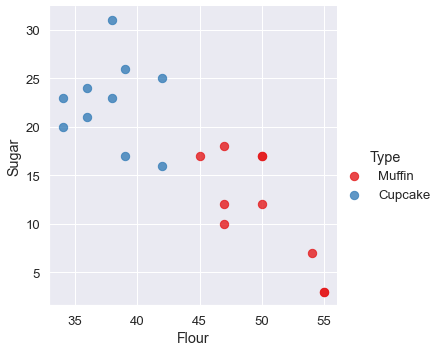

In [15]:
# plot our data
sns.lmplot('Flour','Sugar', data=df, hue='Type',
            palette='Set1', fit_reg=False, scatter_kws={"s":70});

In [23]:
# format or pre-process our data
type_label = np.where(df['Type']=='Muffin', 0,1)
df_features = df.columns.values[1:].tolist()
df_features

['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']

In [20]:
ingredients = df[['Flour', 'Sugar']].values
ingredients

array([[55,  3],
       [47, 12],
       [47, 18],
       [45, 17],
       [50, 12],
       [55,  3],
       [54,  7],
       [47, 10],
       [50, 17],
       [50, 17],
       [39, 26],
       [42, 16],
       [34, 20],
       [39, 17],
       [38, 23],
       [42, 25],
       [36, 21],
       [38, 31],
       [36, 24],
       [34, 23]], dtype=int64)

In [24]:
## fit model
model = svm.SVC(kernel='linear')
model.fit(ingredients, type_label)

SVC(kernel='linear')

In [25]:
## get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30,60)
yy = a * xx - (model.intercept_[0]) / w[1]

## plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx +(b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[0] - a * b[0])

In [26]:
yy

array([ 1.15779472e+16,  1.10528750e+16,  1.05278028e+16,  1.00027306e+16,
        9.47765844e+15,  8.95258624e+15,  8.42751405e+15,  7.90244185e+15,
        7.37736965e+15,  6.85229746e+15,  6.32722526e+15,  5.80215306e+15,
        5.27708087e+15,  4.75200867e+15,  4.22693647e+15,  3.70186428e+15,
        3.17679208e+15,  2.65171988e+15,  2.12664769e+15,  1.60157549e+15,
        1.07650329e+15,  5.51431096e+14,  2.63588995e+13, -4.98713297e+14,
       -1.02378549e+15, -1.54885769e+15, -2.07392989e+15, -2.59900208e+15,
       -3.12407428e+15, -3.64914648e+15, -4.17421867e+15, -4.69929087e+15,
       -5.22436307e+15, -5.74943526e+15, -6.27450746e+15, -6.79957966e+15,
       -7.32465185e+15, -7.84972405e+15, -8.37479625e+15, -8.89986844e+15,
       -9.42494064e+15, -9.95001284e+15, -1.04750850e+16, -1.10001572e+16,
       -1.15252294e+16, -1.20503016e+16, -1.25753738e+16, -1.31004460e+16,
       -1.36255182e+16, -1.41505904e+16])

In [27]:
xx

array([30.        , 30.6122449 , 31.2244898 , 31.83673469, 32.44897959,
       33.06122449, 33.67346939, 34.28571429, 34.89795918, 35.51020408,
       36.12244898, 36.73469388, 37.34693878, 37.95918367, 38.57142857,
       39.18367347, 39.79591837, 40.40816327, 41.02040816, 41.63265306,
       42.24489796, 42.85714286, 43.46938776, 44.08163265, 44.69387755,
       45.30612245, 45.91836735, 46.53061224, 47.14285714, 47.75510204,
       48.36734694, 48.97959184, 49.59183673, 50.20408163, 50.81632653,
       51.42857143, 52.04081633, 52.65306122, 53.26530612, 53.87755102,
       54.48979592, 55.10204082, 55.71428571, 56.32653061, 56.93877551,
       57.55102041, 58.16326531, 58.7755102 , 59.3877551 , 60.        ])

C:\Users\HP\anaconda3\envs\ds_course\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


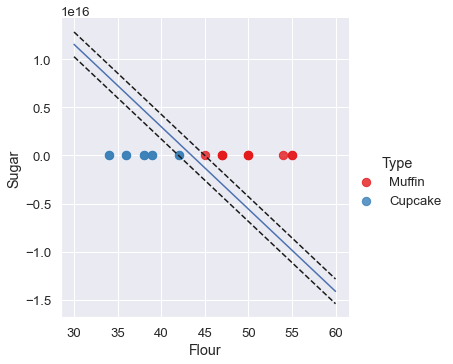

In [32]:
sns.lmplot('Flour','Sugar', data=df, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s":70});

plt.plot(xx,yy)
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

In [38]:
## create a function to predict muffin or cupcake
def muffin_or_cupcake(flour, sugar):
    if(model.predict([[flour, sugar]]))==0:
        print('You are looking at a muffin recipe!')
    else:
        print('You are looking at a cupcake recipe!')

In [40]:
muffin_or_cupcake(12,13)

You are looking at a cupcake recipe!


C:\Users\HP\anaconda3\envs\ds_course\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


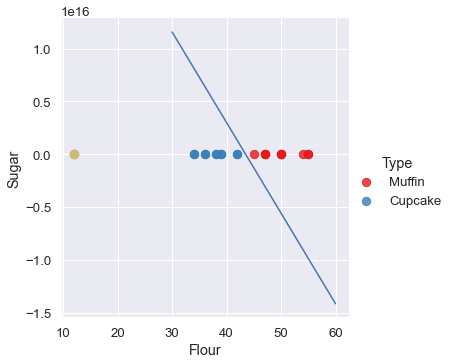

In [42]:
sns.lmplot('Flour','Sugar', data=df, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s":70});

plt.plot(xx,yy)
plt.plot(12,13, 'yo', markersize='9')